# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Munish
[nltk_data]     Lohani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Munish
[nltk_data]     Lohani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Opening dataset

In [3]:
df=pd.read_csv('Emotion_classify_Data.csv')
df.head(7)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [5]:
#EDA

In [6]:
df.groupby('Emotion').count()

,Comment
Emotion,
anger,2000
fear,1937
joy,2000


In [7]:
df['Length']=(df['Emotion']).apply(len)
df

,Comment,Emotion,Length
0,i seriously hate one subject to death but now ...,fear,4
1,im so full of life i feel appalled,anger,5
2,i sit here to write i start to dig out my feel...,fear,4
3,ive been really angry with r and i feel like a...,joy,3
4,i feel suspicious if there is no one outside l...,fear,4
...,...,...,...
5932,i begun to feel distressed for you,fear,4
5933,i left feeling annoyed and angry thinking that...,anger,5
5934,i were to ever get married i d have everything...,joy,3
5935,i feel reluctant in applying there because i w...,fear,4


In [8]:
df.describe()

,Length
count,5937.000000
mean,4.000000
std,0.820886
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [9]:
#Text Cleaning


## Classification

In [10]:
import string
from nltk.corpus import stopwords


# Data Cleaning using regex, stopwords,stemmer

In [11]:
stemmer=PorterStemmer()
stopwords= stopwords.words('english')
df['cleaned']=list(filter(lambda x:[i for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in stopwords],df['Comment']))
df['cleaned']=df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,Comment,Emotion,Length,cleaned
0,i seriously hate one subject to death but now ...,fear,4,i serious hate one subject to death but now i ...
1,im so full of life i feel appalled,anger,5,im so full of life i feel appal
2,i sit here to write i start to dig out my feel...,fear,4,i sit here to write i start to dig out my feel...
3,ive been really angry with r and i feel like a...,joy,3,ive been realli angri with r and i feel like a...
4,i feel suspicious if there is no one outside l...,fear,4,i feel suspici if there is no one outsid like ...
...,...,...,...,...
5932,i begun to feel distressed for you,fear,4,i begun to feel distress for you
5933,i left feeling annoyed and angry thinking that...,anger,5,i left feel annoy and angri think that i wa th...
5934,i were to ever get married i d have everything...,joy,3,i were to ever get marri i d have everyth read...
5935,i feel reluctant in applying there because i w...,fear,4,i feel reluct in appli there becaus i want to ...


## Training the classification Model

In [12]:
# Training
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [17]:
vectorizer=TfidfVectorizer(stop_words='english')
x=df['cleaned']
y=df['Emotion']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)


#pipeline
pipeline=Pipeline([('vect',vectorizer),
                    ('chi', SelectKBest(chi2, k=2000)),
                ('clf',LogisticRegression(random_state=0))
])

model=pipeline.fit(x_train,y_train)


In [22]:
#accuracy
from sklearn.metrics import accuracy_score
predict_emotion=model.predict(x_test)
print('Accuracy score', accuracy_score(y_test,predict_emotion))
print('\n')
print(predict_emotion)

Accuracy score 0.9191919191919192


['joy' 'anger' 'anger' 'fear' 'joy' 'fear' 'joy' 'fear' 'anger' 'anger'
 'joy' 'anger' 'fear' 'fear' 'anger' 'joy' 'joy' 'fear' 'fear' 'anger'
 'anger' 'joy' 'joy' 'joy' 'anger' 'anger' 'anger' 'joy' 'joy' 'fear'
 'joy' 'anger' 'anger' 'joy' 'joy' 'anger' 'joy' 'anger' 'anger' 'anger'
 'joy' 'anger' 'joy' 'anger' 'joy' 'joy' 'anger' 'anger' 'anger' 'fear'
 'joy' 'anger' 'joy' 'joy' 'anger' 'anger' 'fear' 'fear' 'anger' 'anger'
 'joy' 'joy' 'joy' 'anger' 'anger' 'anger' 'anger' 'anger' 'anger' 'anger'
 'anger' 'joy' 'fear' 'anger' 'anger' 'fear' 'fear' 'joy' 'fear' 'anger'
 'anger' 'joy' 'joy' 'anger' 'joy' 'anger' 'fear' 'joy' 'joy' 'fear'
 'anger' 'joy' 'joy' 'fear' 'joy' 'fear' 'joy' 'joy' 'fear' 'joy' 'anger'
 'fear' 'joy' 'joy' 'anger' 'fear' 'anger' 'joy' 'anger' 'anger' 'fear'
 'fear' 'joy' 'joy' 'anger' 'fear' 'joy' 'joy' 'anger' 'joy' 'joy' 'anger'
 'fear' 'joy' 'anger' 'joy' 'fear' 'fear' 'fear' 'fear' 'anger' 'anger'
 'anger' 'anger' 'fear'

In [18]:
#input

text=input('Enter a type of text: ')
pred={'predicted text':[text]}
dataframe=pd.DataFrame(pred)
prediction=model.predict(dataframe['predicted text'])
print('predicted class= ',prediction[0])

Enter a type of text: Just love this thing
predicted class=  joy


## Confusion Matrix for accessing Performance of the model


In [33]:
#Confusion Matrix
ytest=np.array(y_test)
print(classification_report(model.predict(x_test),ytest))
print(confusion_matrix(model.predict(x_test),y_test))

              precision    recall  f1-score   support

       anger       0.91      0.91      0.91       285
        fear       0.90      0.94      0.92       283
         joy       0.95      0.91      0.93       323

    accuracy                           0.92       891
   macro avg       0.92      0.92      0.92       891
weighted avg       0.92      0.92      0.92       891

[[258  17  10]
 [  9 267   7]
 [ 15  14 294]]


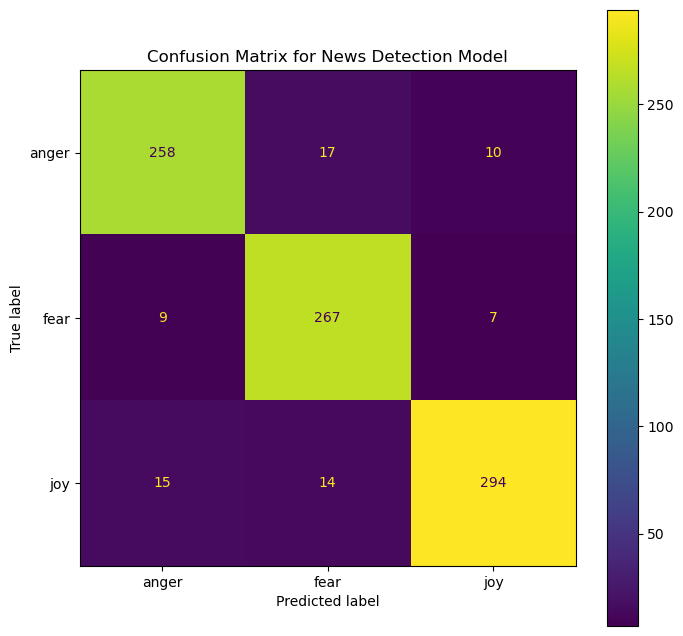

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(x_test),ytest)

fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names=['anger','fear','joy']

display = ConfusionMatrixDisplay(cm, display_labels=class_names)

ax.set(title='Confusion Matrix for News Detection Model')


display.plot(ax=ax);